In [1]:
# Sample API
import flowx
import simulation
import numpy
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40

xmin, xmax = 0.0, 2.0*numpy.pi
ymin, ymax = 0.0, 2.0*numpy.pi

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 0.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc = flowx.serial.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.serial.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.serial.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.serial.Scalars(tmax=2, dt=0.001, Re=1.0)

particles = flowx.serial.Particles()

ins = flowx.ins_main(['velc', 'hvar', 'divv', 'pres'], time_stepping = 'ab2')

poisson = flowx.poisson_main(['pres', 'divv'], solver_type = 'serial_cg', maxiter = 3000)

imbound = flowx.imbound_main(with_ib = False)

In [3]:
simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['to'])
simulation.get_initial(gridc, gridx, gridy, 'velc', 'pres')

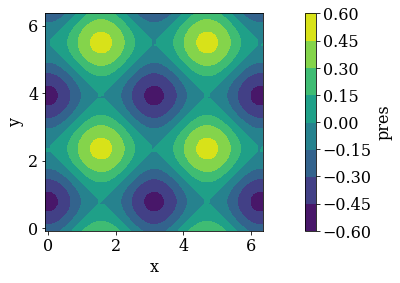

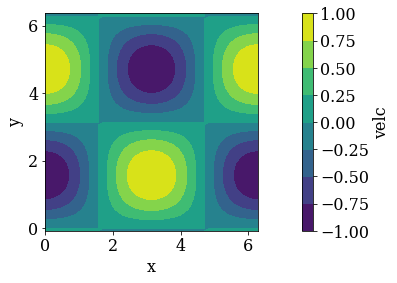

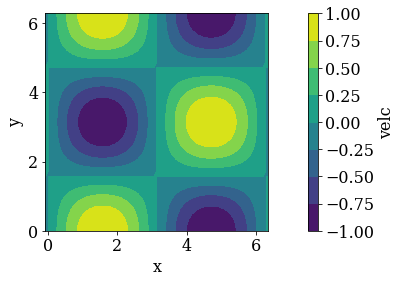

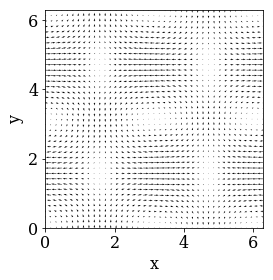

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridy, 'velc')
flowx.io.plot_vector(gridx, gridy, 'velc')

In [5]:
while scalars.variable['time'] <= scalars.variable['tmax']:
    
    # Update the time-dependent boundary condition value
    simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['time'])
    
    ins.advance(poisson, imbound, gridc, gridx, gridy, scalars, particles)
    
    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   
    
    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : 80
Final poisson residual : 9.390110003209861e-10
Max, Min, U   : 0.9969173337331281, -0.996917333733128
Max, Min, V   : 0.996917333733128, -0.9969173337331281
Max, Min, P   : 3.7353468381185673, -3.7572228484942363
Max, Min, DIV : 0.0031700264742590707, -0.003170026475176042


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : 65
Final poisson residual : 9.59728372035432e-10
Max, Min, U   : 0.9771770479217199, -0.9771770479217198
Max, Min, V   : 0.9771770479217198, -0.9771770479217199
Max, Min, P   : 0.4713260258840769, -0.4738459590280123
Max, Min, DIV : 2.4597286152339137e-09, -2.2647031819311714e-09


------------ Time = 0.02000000000000001 ---------------
Number of poisson iterations    : 60
Final poisson residual : 7.005152565518205e-10
Max, Min, U   : 0.9578276459586815, -0.9578276459586814
Max, Min, V   : 0.9578276459586814, -0.9578276459586815
Max, Min, P   : 0.452

------------ Time = 0.23000000000000018 ---------------
Number of poisson iterations    : 28
Final poisson residual : 6.188782255752525e-10
Max, Min, U   : 0.6293376087080936, -0.6293376087080935
Max, Min, V   : 0.6293376087080935, -0.6293376087080936
Max, Min, P   : 0.19574789866450976, -0.19646675797487242
Max, Min, DIV : 2.1594063204233294e-09, -1.711095598544432e-09


------------ Time = 0.24000000000000019 ---------------
Number of poisson iterations    : 28
Final poisson residual : 6.627792108562618e-10
Max, Min, U   : 0.6168758891177192, -0.6168758891177192
Max, Min, V   : 0.6168758891177192, -0.6168758891177192
Max, Min, P   : 0.18808258290214727, -0.18876171479196985
Max, Min, DIV : 1.940696825464272e-09, -1.9573847404030786e-09


------------ Time = 0.25000000000000017 ---------------
Number of poisson iterations    : 28
Final poisson residual : 7.28928507336274e-10
Max, Min, U   : 0.6046609281081134, -0.6046609281081134
Max, Min, V   : 0.6046609281081134, -0.6046609281081134

------------ Time = 0.5000000000000003 ---------------
Number of poisson iterations    : 23
Final poisson residual : 8.563552390866198e-10
Max, Min, U   : 0.3667453916278672, -0.3667453916278671
Max, Min, V   : 0.3667453916278671, -0.3667453916278672
Max, Min, P   : 0.06655758766369677, -0.06668787260857317
Max, Min, DIV : 2.281837496731498e-09, -2.5279282833690075e-09


------------ Time = 0.5100000000000003 ---------------
Number of poisson iterations    : 23
Final poisson residual : 9.119847745120675e-10
Max, Min, U   : 0.3594833463150018, -0.35948334631500173
Max, Min, V   : 0.35948334631500173, -0.3594833463150018
Max, Min, P   : 0.06395065017864886, -0.06407137400523624
Max, Min, DIV : 3.322845554265541e-09, -2.1199388910986272e-09


------------ Time = 0.5200000000000004 ---------------
Number of poisson iterations    : 22
Final poisson residual : 9.810262970743452e-10
Max, Min, U   : 0.3523650991338376, -0.35236509913383757
Max, Min, V   : 0.35236509913383757, -0.35236509913383

------------ Time = 0.7700000000000006 ---------------
Number of poisson iterations    : 18
Final poisson residual : 9.170243248108324e-10
Max, Min, U   : 0.21372023603735393, -0.2137202360373539
Max, Min, V   : 0.2137202360373539, -0.21372023603735393
Max, Min, P   : 0.022632033506382272, -0.02266091481118125
Max, Min, DIV : 2.9315588012668314e-09, -2.8691171383155023e-09


------------ Time = 0.7800000000000006 ---------------
Number of poisson iterations    : 18
Final poisson residual : 9.089458183114446e-10
Max, Min, U   : 0.2094882918226209, -0.20948829182262088
Max, Min, V   : 0.20948829182262088, -0.2094882918226209
Max, Min, P   : 0.021745787437129637, -0.021774442922486828
Max, Min, DIV : 3.521523267435711e-09, -3.41399389314212e-09


------------ Time = 0.7900000000000006 ---------------
Number of poisson iterations    : 18
Final poisson residual : 8.980599908001024e-10
Max, Min, U   : 0.20534014571783138, -0.20534014571783138
Max, Min, V   : 0.20534014571783138, -0.205340145

------------ Time = 0.9900000000000008 ---------------
Number of poisson iterations    : 12
Final poisson residual : 8.654389008206129e-10
Max, Min, U   : 0.1376795331767825, -0.13767956561724015
Max, Min, V   : 0.13767953729897422, -0.13767956149430335
Max, Min, P   : 0.009399938926870629, -0.00942223964472059
Max, Min, DIV : 2.5139301473853237e-09, -2.813602253959324e-09


------------ Time = 1.0000000000000007 ---------------
Number of poisson iterations    : 14
Final poisson residual : 9.550321296213022e-10
Max, Min, U   : 0.13495697012422467, -0.1349570018534762
Max, Min, V   : 0.13495697409415786, -0.13495699787536825
Max, Min, P   : 0.00903190364773028, -0.009053938634250778
Max, Min, DIV : 2.7372405453363058e-09, -2.7201144947586187e-09


------------ Time = 1.0099999999999996 ---------------
Number of poisson iterations    : 14
Final poisson residual : 8.308695611878873e-10
Max, Min, U   : 0.13228826243141456, -0.1322882934363664
Max, Min, V   : 0.1322882662357218, -0.13228828

------------ Time = 1.269999999999971 ---------------
Number of poisson iterations    : 9
Final poisson residual : 6.829886079362497e-10
Max, Min, U   : 0.07870832057848917, -0.078708337821945
Max, Min, V   : 0.07870832220353591, -0.07870833614750791
Max, Min, P   : 0.00307381876709229, -0.0030874860888364603
Max, Min, DIV : 2.1582784448526127e-09, -2.0495634286965547e-09


------------ Time = 1.2799999999999698 ---------------
Number of poisson iterations    : 10
Final poisson residual : 8.402387062103792e-10
Max, Min, U   : 0.0771522438595989, -0.07715226075015039
Max, Min, V   : 0.07715224547099417, -0.07715225911284232
Max, Min, P   : 0.0029535679943953987, -0.002966965894781362
Max, Min, DIV : 2.4165125386832464e-09, -2.432490910087015e-09


------------ Time = 1.2899999999999687 ---------------
Number of poisson iterations    : 10
Final poisson residual : 8.266263049724604e-10
Max, Min, U   : 0.07562694535272803, -0.07562696183805978
Max, Min, V   : 0.07562694690386454, -0.075626

------------ Time = 1.569999999999938 ---------------
Number of poisson iterations    : 9
Final poisson residual : 8.156525735604557e-10
Max, Min, U   : 0.04324119134215842, -0.04324119999703462
Max, Min, V   : 0.04324119205489064, -0.043241199237419724
Max, Min, P   : 0.0009288112263564604, -0.0009359314007245768
Max, Min, DIV : 2.8515020622510434e-09, -2.3733277964427257e-09


------------ Time = 1.5799999999999368 ---------------
Number of poisson iterations    : 10
Final poisson residual : 6.155965976489885e-10
Max, Min, U   : 0.04238658418607078, -0.04238659270754596
Max, Min, V   : 0.042386584955749866, -0.042386591924369985
Max, Min, P   : 0.000892515498944565, -0.0008994461461652895
Max, Min, DIV : 2.4430595879643136e-09, -1.7350329797015396e-09


------------ Time = 1.5899999999999357 ---------------
Number of poisson iterations    : 9
Final poisson residual : 8.67998328921546e-10
Max, Min, U   : 0.041548877686853156, -0.04154888597277387
Max, Min, V   : 0.04154887842941205, -

------------ Time = 1.8699999999999048 ---------------
Number of poisson iterations    : 9
Final poisson residual : 8.200319831246161e-10
Max, Min, U   : 0.02376135085199963, -0.023761355131131114
Max, Min, V   : 0.023761351180819748, -0.02376135481230979
Max, Min, P   : 0.0002808732871542207, -0.00028420284313915073
Max, Min, DIV : 2.451721992091649e-09, -2.375334324632855e-09


------------ Time = 1.8799999999999037 ---------------
Number of poisson iterations    : 7
Final poisson residual : 9.040073232947021e-10
Max, Min, U   : 0.023291931940144492, -0.023291936156938624
Max, Min, V   : 0.023291932270932205, -0.023291935833170133
Max, Min, P   : 0.00026991917004219915, -0.0002731822172937587
Max, Min, DIV : 2.5460222376552655e-09, -2.3288379915904073e-09


------------ Time = 1.8899999999999026 ---------------
Number of poisson iterations    : 7
Final poisson residual : 7.898572496640567e-10
Max, Min, U   : 0.02283179356853931, -0.02283179772651203
Max, Min, V   : 0.0228317939573282

In [6]:
simulation.get_analytical(gridc, gridx, gridy, 'asol', scalars.variable['time'])

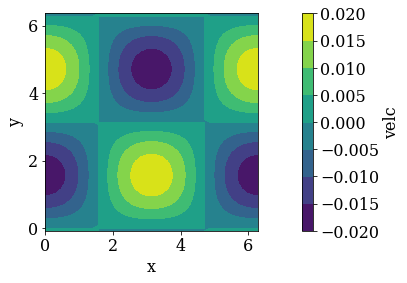

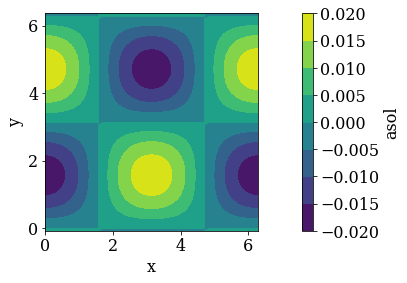

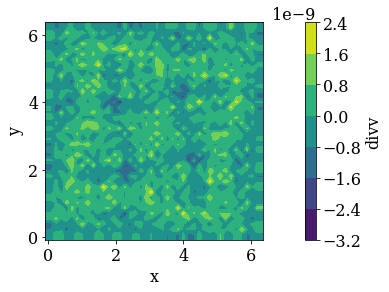

In [7]:
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridx, 'asol')
flowx.io.plot_contour(gridc, 'divv')

In [8]:
gridx.get_error('eror','velc','asol')
gridy.get_error('eror','velc','asol')

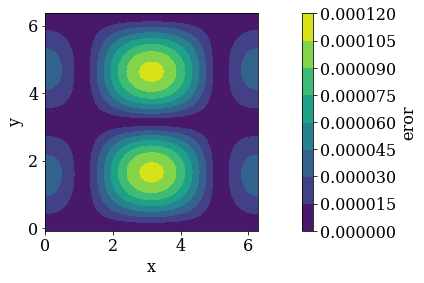

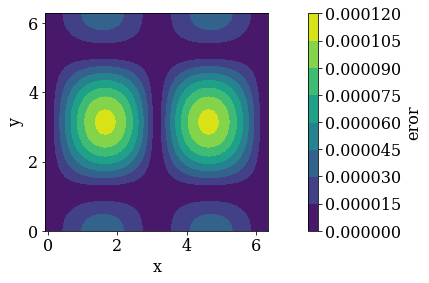

In [9]:
flowx.io.plot_contour(gridx, 'eror')
flowx.io.plot_contour(gridy, 'eror')